In [1]:
from keras.models import load_model
import tensorflow as tf
import cv2
model = load_model('C://Users//shifa//Desktop//facial//_mini_XCEPTION.77-0.65.hdf5')
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 46, 46, 8)    72          input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 46, 46, 8)    32          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 46, 46, 8)    0           batch_normalization_15[0][0]     
__________________________________________________________________________________________________
conv2d_9 (

In [2]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

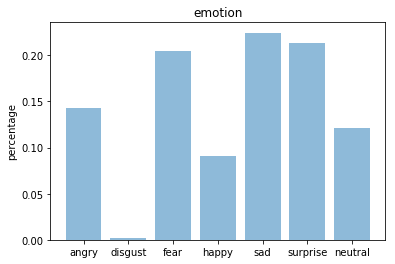

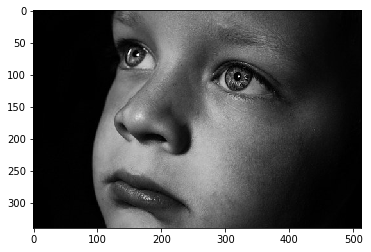

In [6]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


file = 'sad.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))
#plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48])
plt.imshow(x)

plt.gray()
plt.imshow(true_image)
plt.show()

In [8]:
#face detection with haarcascade_frontface_default

import cv2
import sys
import os


class FaceCropper(object):
    CASCADE_PATH = 'C://Users//shifa//Desktop//facial//haarcascade_frontalface_default.xml'

    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(self.CASCADE_PATH)

    def generate(self, image_path, show_result):
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(img, 1.1, 3, minSize=(100, 100))
        if (faces is None):
            print('Failed to detect face')
            return 0

        if (show_result):
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)
        i = 0
        height, width = img.shape[:2]

        for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)

            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (32, 32))
            i += 1
            cv2.imwrite("image%d.jpg" % i, lastimg)


if __name__ == '__main__':
    args = sys.argv
    argc = len(args)

    if (argc != 2):
        print('Usage: %s [image file]' % args[0])
        quit()

    detecter = FaceCropper()
    img_path = "C:\\Users\\shifa\\camera.jpg"
    detecter.generate(img_path, True)

Usage: c:\users\shifa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py [image file]
Detected faces: 1


True
[[[200 190 216]
  [201 191 217]
  [203 193 219]
  ...
  [ 95  98 112]
  [ 97 100 114]
  [ 97 100 114]]

 [[201 191 217]
  [203 193 219]
  [204 194 220]
  ...
  [ 95  98 112]
  [ 96  99 113]
  [ 96  99 113]]

 [[198 193 215]
  [199 193 218]
  [199 193 218]
  ...
  [ 96 100 111]
  [ 96 100 111]
  [ 94  98 109]]

 ...

 [[169 182 220]
  [169 182 220]
  [167 182 220]
  ...
  [101 113 140]
  [101 116 140]
  [101 116 140]]

 [[168 182 225]
  [168 182 225]
  [165 181 224]
  ...
  [104 113 143]
  [103 115 142]
  [102 114 141]]

 [[169 183 226]
  [169 183 226]
  [166 182 225]
  ...
  [104 113 143]
  [102 114 141]
  [100 112 139]]]


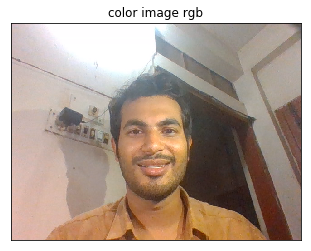

In [7]:
#camera input

import cv2
import matplotlib.pyplot as plt

def main():
    cap = cv2.VideoCapture(0)

    if cap.isOpened():
        ret , frame = cap.read()
        print(ret)
        print(frame)

    else:
        ret = False

    img = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
    cv2.imwrite('camera.jpg',img)

    plt.imshow(img)
    plt.title('color image rgb')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    cap.release()

if __name__ == "__main__":
    main()